In [ ]:
import sys
import os

sys.path.append(os.path.abspath(".."))

import schemas.Categories as cat
import schemas.Customers as cus
import schemas.OrderDetails as od
import schemas.Orders as o
import schemas.Products as p
import pandas as pd
import numpy as np


orders_df = o.orders_df()
order_details_df = od.order_details_df()
customers_df = cus.customers_df()
products_df = p.products_df()
categories_df = cat.categories_df()


dfOrders
    order_id customer_id  employee_id  order_date required_date shipped_date  \
0     10248       VINET            5  1996-07-04    1996-08-01   1996-07-16   
1     10249       TOMSP            6  1996-07-05    1996-08-16   1996-07-10   
2     10250       HANAR            4  1996-07-08    1996-08-05   1996-07-12   

   ship_via  freight                  ship_name        ship_address  \
0         3    32.38  Vins et alcools Chevalier  59 rue de l'Abbaye   
1         1    11.61         Toms Spezialitäten       Luisenstr. 48   
2         2    65.83              Hanari Carnes     Rua do Paço, 67   

        ship_city ship_region ship_postal_code ship_country  
0           Reims        None            51100       France  
1         Münster        None            44087      Germany  
2  Rio de Janeiro          RJ        05454-876       Brazil  
### Orders DataFrame ###
##################### info #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 

In [8]:
def check_df(dataframe, head=5):
    print("##################### Genel Bilgi (info) #####################")
    dataframe.info()
    
    print("\n##################### Şekil (Shape) #####################")
    print(dataframe.shape)
    
    print("\n##################### Sütun Tipleri (Types) #####################")
    print(dataframe.dtypes)
    
    print("\n##################### Eksik Değerler (NA) #####################")
    print(dataframe.isnull().sum())
    
    print("\n##################### İlk {} Kayıt (Head) #####################".format(head))
    print(dataframe.head(head))
    
    print("\n##################### Son {} Kayıt (Tail) #####################".format(head))
    print(dataframe.tail(head))
    
    print("\n##################### Sayısal Sütunlar İstatistikleri (Quantiles) #####################")
    num_cols = dataframe.select_dtypes(include=['number'])
    print(num_cols.quantile([0, 0.05, 0.25, 0.5, 0.75, 0.95, 1]).T)


In [9]:
check_df(orders_df)

##################### Genel Bilgi (info) #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          830 non-null    int64         
 1   customer_id       830 non-null    object        
 2   employee_id       830 non-null    int64         
 3   order_date        830 non-null    datetime64[ns]
 4   required_date     830 non-null    datetime64[ns]
 5   shipped_date      830 non-null    datetime64[ns]
 6   ship_via          830 non-null    int64         
 7   freight           830 non-null    float64       
 8   ship_name         830 non-null    object        
 9   ship_address      830 non-null    object        
 10  ship_city         830 non-null    object        
 11  ship_postal_code  830 non-null    object        
 12  ship_country      830 non-null    object        
dtypes: datetime64[ns]

In [10]:
check_df(order_details_df)

##################### Genel Bilgi (info) #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    2155 non-null   int64  
 1   product_id  2155 non-null   int64  
 2   unit_price  2155 non-null   float64
 3   quantity    2155 non-null   int64  
 4   discount    2155 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 84.3 KB

##################### Şekil (Shape) #####################
(2155, 5)

##################### Sütun Tipleri (Types) #####################
order_id        int64
product_id      int64
unit_price    float64
quantity        int64
discount      float64
dtype: object

##################### Eksik Değerler (NA) #####################
order_id      0
product_id    0
unit_price    0
quantity      0
discount      0
dtype: int64

##################### İlk 5 Kayıt (Head) #####################
   order_id

In [11]:
check_df(products_df)

##################### Genel Bilgi (info) #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         77 non-null     int64  
 1   product_name       77 non-null     object 
 2   supplier_id        77 non-null     int64  
 3   category_id        77 non-null     int64  
 4   quantity_per_unit  77 non-null     object 
 5   unit_price         77 non-null     float64
 6   units_in_stock     77 non-null     int64  
 7   units_on_order     77 non-null     int64  
 8   reorder_level      77 non-null     int64  
 9   discontinued       77 non-null     int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 6.1+ KB

##################### Şekil (Shape) #####################
(77, 10)

##################### Sütun Tipleri (Types) #####################
product_id             int64
product_name          object
sup

In [12]:
check_df(categories_df)

##################### Genel Bilgi (info) #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_id    8 non-null      int64 
 1   category_name  8 non-null      object
 2   description    8 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes

##################### Şekil (Shape) #####################
(8, 3)

##################### Sütun Tipleri (Types) #####################
category_id       int64
category_name    object
description      object
dtype: object

##################### Eksik Değerler (NA) #####################
category_id      0
category_name    0
description      0
dtype: int64

##################### İlk 5 Kayıt (Head) #####################
   category_id   category_name  \
0            1       Beverages   
1            2      Condiments   
2            3     Confections   
3            

In [13]:
check_df(customers_df)

##################### Genel Bilgi (info) #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    91 non-null     object
 1   company_name   91 non-null     object
 2   contact_name   91 non-null     object
 3   contact_title  91 non-null     object
 4   address        91 non-null     object
 5   city           91 non-null     object
 6   postal_code    91 non-null     object
 7   country        91 non-null     object
dtypes: object(8)
memory usage: 5.8+ KB

##################### Şekil (Shape) #####################
(91, 8)

##################### Sütun Tipleri (Types) #####################
customer_id      object
company_name     object
contact_name     object
contact_title    object
address          object
city             object
postal_code      object
country          object
dtype: object

##################### Ek

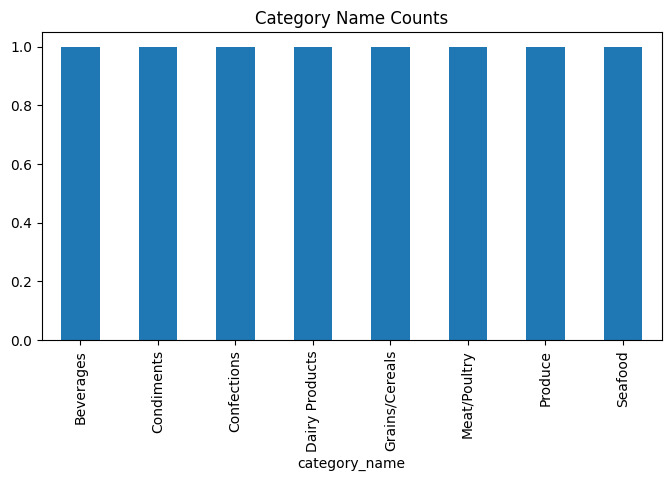

In [14]:
import matplotlib.pyplot as plt

category_counts = categories_df["category_name"].value_counts()
plt.figure(figsize=(8,4))
category_counts.plot(kind="bar", title="Category Name Counts")
plt.show()

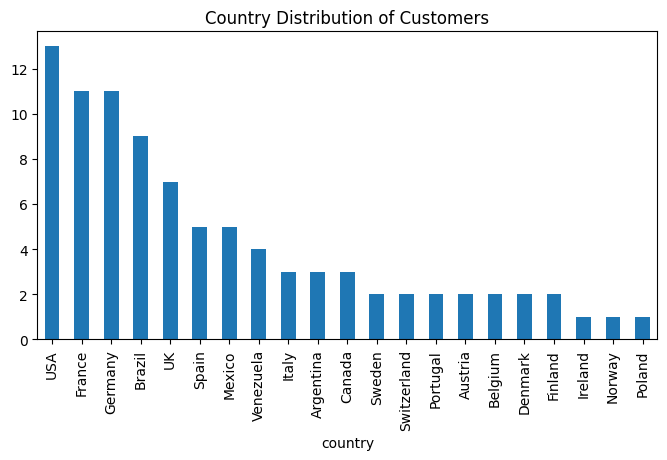

In [15]:
country_counts = customers_df["country"].value_counts()
plt.figure(figsize=(8,4))
country_counts.plot(kind="bar", title="Country Distribution of Customers")
plt.show()


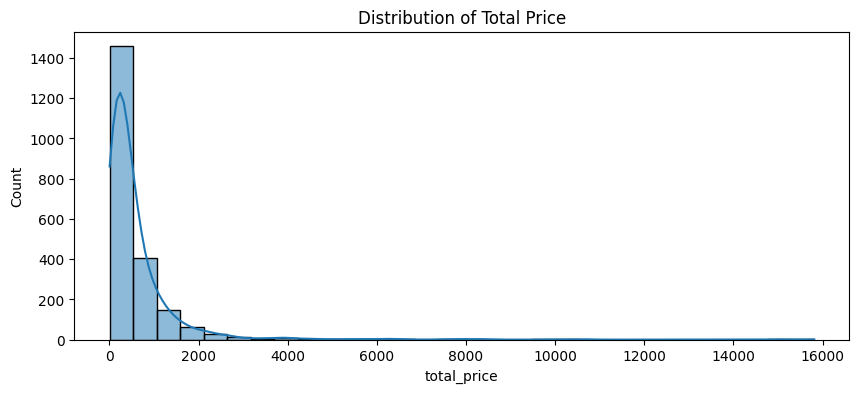

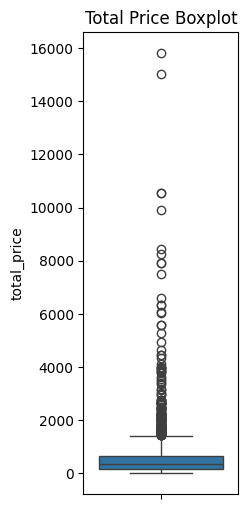

In [17]:
import seaborn as sns

plt.figure(figsize=(10,4))

order_details_df["total_price"] = order_details_df["quantity"] * order_details_df["unit_price"] * (1 - order_details_df["discount"])
sns.histplot(order_details_df["total_price"], kde=True, bins=30)
plt.title("Distribution of Total Price")
plt.show()

plt.figure(figsize=(2,6))
sns.boxplot(y=order_details_df["total_price"])
plt.title("Total Price Boxplot")
plt.show()


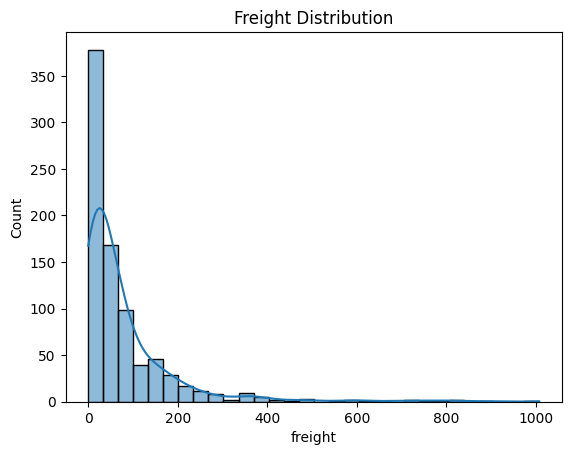

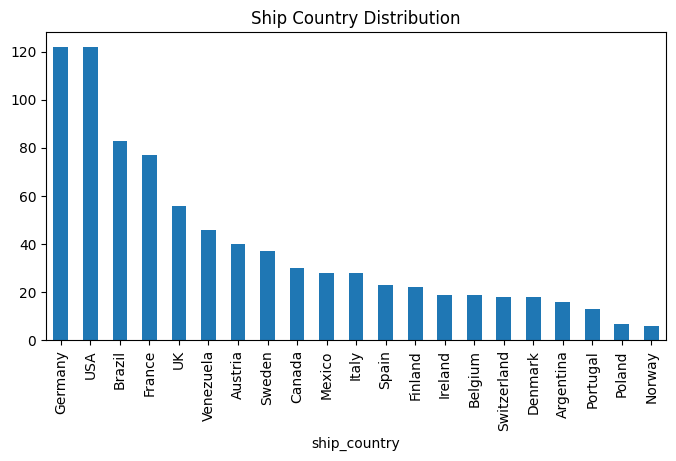

In [19]:
sns.histplot(orders_df["freight"], kde=True, bins=30)
plt.title("Freight Distribution")
plt.show()

country_counts = orders_df["ship_country"].value_counts()
country_counts.plot(kind="bar", figsize=(8,4), title="Ship Country Distribution")
plt.show()

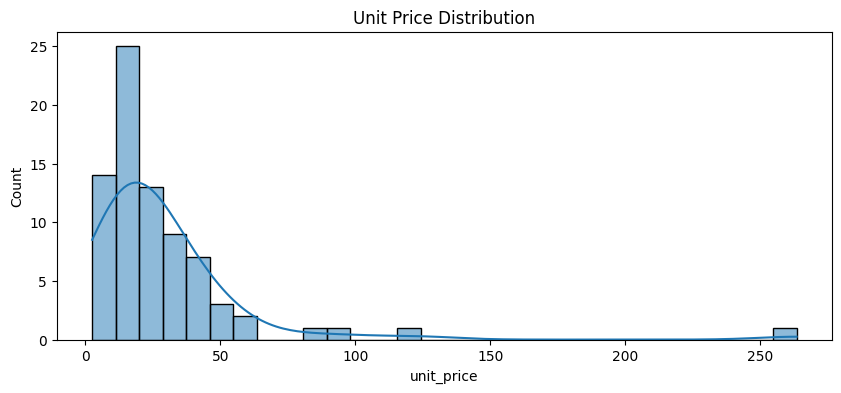

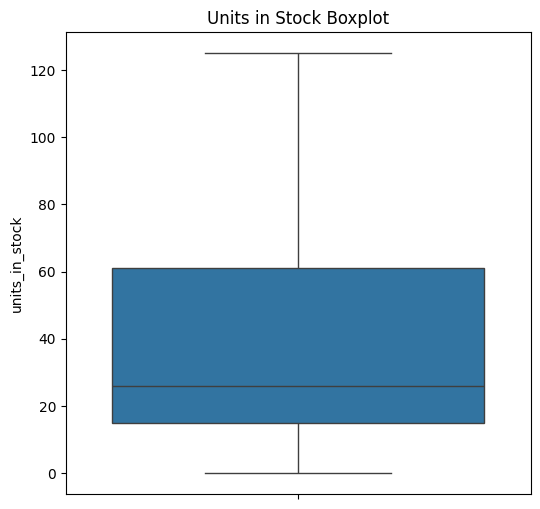

In [20]:
plt.figure(figsize=(10,4))
sns.histplot(products_df["unit_price"], kde=True, bins=30)
plt.title("Unit Price Distribution")
plt.show()

plt.figure(figsize=(6,6))
sns.boxplot(y=products_df["units_in_stock"])
plt.title("Units in Stock Boxplot")
plt.show()


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_matrix(dataframe, figsize=(10, 8), cmap="coolwarm"):
    numeric_df = dataframe.select_dtypes(include=['number'])
    corr_matrix = numeric_df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap=cmap, fmt=".2f")
    plt.title("Korelasyon Matrisi")
    plt.show()
    
    return corr_matrix


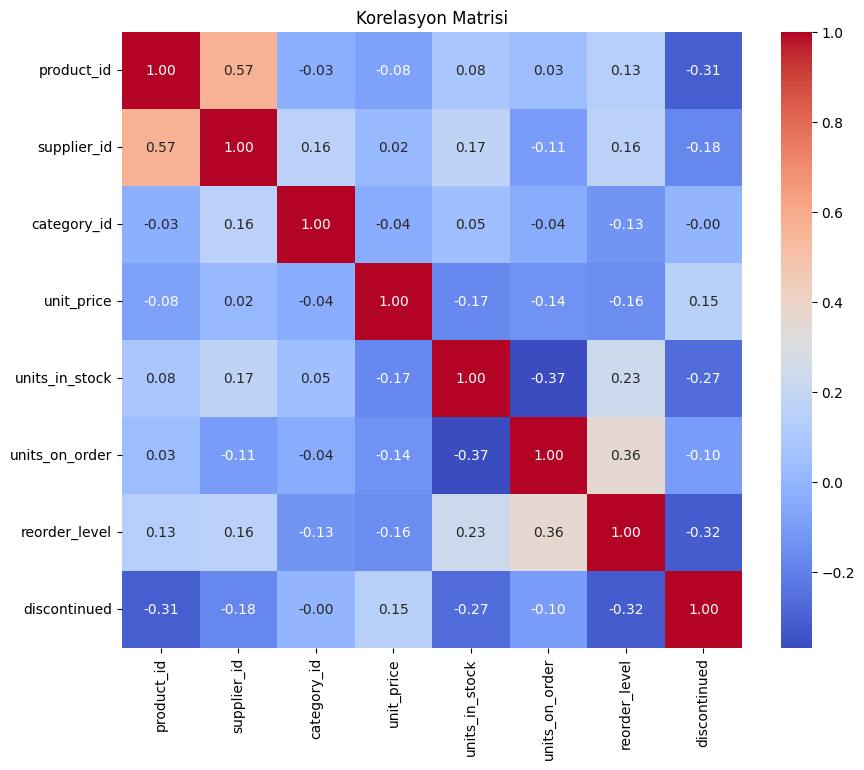

,product_id,supplier_id,category_id,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
product_id,1.000000,0.569552,-0.028240,-0.084063,0.083567,0.034565,0.133436,-0.312876
supplier_id,0.569552,1.000000,0.156584,0.020729,0.173745,-0.105599,0.156363,-0.179196
category_id,-0.028240,0.156584,1.000000,-0.038033,0.045663,-0.038263,-0.131782,-0.002741
unit_price,-0.084063,0.020729,-0.038033,1.000000,-0.171943,-0.136360,-0.159156,0.145643
units_in_stock,0.083567,0.173745,0.045663,-0.171943,1.000000,-0.369419,0.231562,-0.266865
units_on_order,0.034565,-0.105599,-0.038263,-0.136360,-0.369419,1.000000,0.362830,-0.103008
reorder_level,0.133436,0.156363,-0.131782,-0.159156,0.231562,0.362830,1.000000,-0.319014
discontinued,-0.312876,-0.179196,-0.002741,0.145643,-0.266865,-0.103008,-0.319014,1.000000


In [32]:
plot_correlation_matrix(products_df)

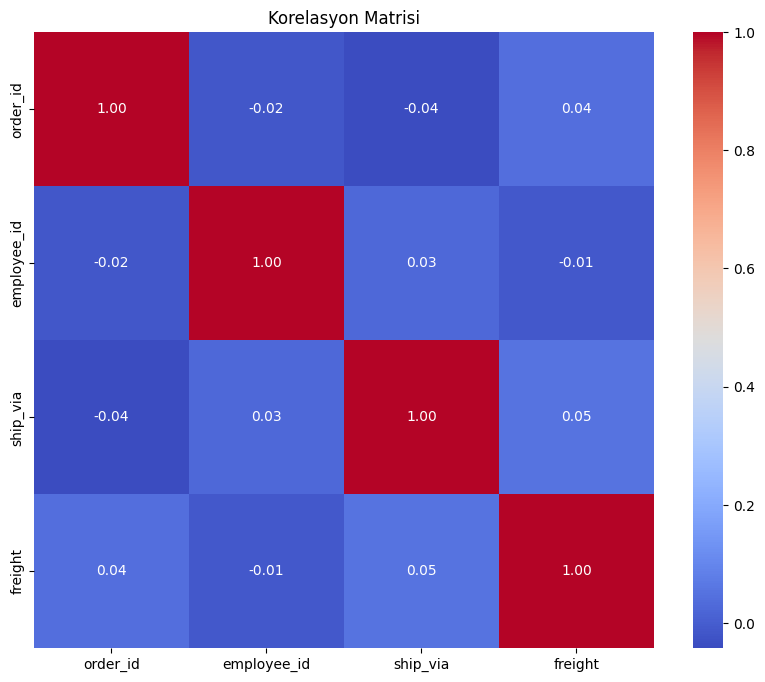

,order_id,employee_id,ship_via,freight
order_id,1.000000,-0.016486,-0.042591,0.042170
employee_id,-0.016486,1.000000,0.025734,-0.012151
ship_via,-0.042591,0.025734,1.000000,0.051108
freight,0.042170,-0.012151,0.051108,1.000000


In [37]:
plot_correlation_matrix(orders_df)

In [38]:
def check_low_variance(dataframe, threshold=0.01):
    
    num_df = dataframe.select_dtypes(include=['number'])
    variances = num_df.var()
    low_var = variances[variances < threshold]
    
    if low_var.empty:
        print("Hiçbir sütun düşük varyansa sahip değil (eşik:", threshold, ")")
    else:
        print("Düşük varyansa sahip sütunlar (eşik:", threshold, "):\n")
        print(low_var)
    
    return low_var.index.tolist()

In [40]:
check_low_variance(products_df)
check_low_variance(categories_df)
check_low_variance(customers_df)
check_low_variance(order_details_df)
check_low_variance(orders_df)

Hiçbir sütun düşük varyansa sahip değil (eşik: 0.01 )
Hiçbir sütun düşük varyansa sahip değil (eşik: 0.01 )
Hiçbir sütun düşük varyansa sahip değil (eşik: 0.01 )
Düşük varyansa sahip sütunlar (eşik: 0.01 ):

discount    0.006964
dtype: float64
Hiçbir sütun düşük varyansa sahip değil (eşik: 0.01 )


[]